# California Crime Analysis (R)
### Dataset Description
This project uses the “California Crime and Law Enforcement” dataset (2015) from Kaggle. It includes crime statistics by city and county in California (e.g., violent and property crimes) as well as corresponding law enforcement employee numbers. The dataset enables analysis of crime distribution, officer-to-population ratios, outlier detection, and exploratory modeling.


In [ ]:
#Libraries
library(readr)
#Package for skewness and kurtosis
install.packages("e1071") 
library(e1071) 
#Packages for correlation and NB method
install.packages(caret)
library(caret)
install.packages(corrplot)
library(corrplot)
#Package for function left_join
install.packages("tidyverse")
library(tidyverse)
#Package for spatial data of counties of California, download the map of the counties of California.
install.packages("tigris")
library(tigris)
#Basic package for spatial data
install.packages("sf")
library(sf)
#Package to draw the map
install.packages("ggplot2")
library(ggplot2)


In [25]:
#Load ca_law_enforcement_by_city.csv,provide information about the police force in each city
law_city <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_law_enforcement_by_city.csv")
head(law_city)

,City,Population,Total.law.enforcement.employees,Total..officers,Total..civilians
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Alameda,"78,613",112,83,29
2,Albany,"19,723",30,23,7
3,Alhambra,"86,175",128,85,43
4,Alturas,"2,566",6,5,1
5,Anaheim,"349,471",577,399,178
6,Anderson,"10,277",24,18,6


In [17]:
#Load ca_law_enforcement_by_city.csv ,provide information about the police force in each county.
law_county <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_law_enforcement_by_county.csv")
head(law_county)

,Metropolitan.Nonmetropolitan,County,Total.law.enforcement.employees,Total.officers,Total.civilians
,<chr>,<chr>,<chr>,<chr>,<chr>
1,Metropolitan Counties,Alameda,"1,560",978,582
2,Metropolitan Counties,Butte,288,101,187
3,Metropolitan Counties,Contra Costa,936,610,326
4,Metropolitan Counties,El Dorado,349,164,185
5,Metropolitan Counties,Fresno,"1,043",406,637
6,Metropolitan Counties,Imperial,283,190,93


In [19]:
#Load ca_offenses_by_city.csv,provide information about recorded crimes in California classified by city.
offenses_city <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_offenses_by_city.csv")
head(offenses_city)

,City,Population,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Rape..legacy.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<chr>,<chr>,<int>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Adelanto,"33,005",212,2,14,NA,48,148,808,434,254,120,24
2,Agoura Hills,"20,970",15,0,1,NA,6,8,310,82,217,11,0
3,Alameda,"78,613",148,2,7,NA,61,78,"1,819",228,"1,245",346,18
4,Albany,"19,723",34,1,6,NA,16,11,605,95,447,63,0
5,Alhambra3,"86,175",168,1,13,NA,74,80,"1,929",305,"1,413",211,6
6,Aliso Viejo,"50,751",32,0,5,NA,3,24,363,53,276,34,1


In [21]:
#Preprocessing ca_offenses_by_county.csv data set
#To delete those lines later
offenses_county <- read.csv("C:/Users/chris/OneDrive/Έγγραφα/R_scripts/ca_offenses_by_county.csv",na.strings = c("", " ", "NA"))
head(offenses_county)

,Metropolitan.Nonmetropolitan,County,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Rape.legacy.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,Metropolitan Counties,Alameda,510,6,13,NA,177,314,"2,077",463,985,629,11
2,Metropolitan Counties,Butte3,155,4,20,NA,14,117,"1,422",708,693,21,0
3,Metropolitan Counties,Contra Costa,426,14,24,NA,153,235,"2,013",660,"1,332",21,18
4,Metropolitan Counties,El Dorado3,252,9,46,NA,32,165,"2,031",577,"1,412",42,4
5,Metropolitan Counties,Fresno,962,8,32,NA,112,810,"3,810","1,398","1,838",574,145
6,Metropolitan Counties,Imperial3,219,0,6,NA,7,206,625,202,395,28,21


# Preprocessing ca_law_enforcement_by_city.csv

In [51]:
#Preprocessing ca_law_enforcement_by_city.csv
#Population attribute changed from character to numeric type
str(law_city$Population)
law_city$Population <- as.numeric(gsub(",", "", law_city$Population))


 num [1:333] 78613 19723 86175 2566 349471 ...


In [37]:
str(law_city$Total.law.enforcement.employees)
law_city$Total.law.enforcement.employees <- as.numeric(gsub(",","",law_city$Total.law.enforcement.employees))
str(law_city$Total..officers)
law_city$Total..officers <- as.numeric(gsub(",","",law_city$Total..officers))
str(law_city$Total..civilians)
law_city$Total..civilians <- as.numeric(gsub(",","",law_city$Total..civilians))
str(law_city)

 chr [1:333] "112" "30" "128" "6" "577" "24" "115" "93" "35" "27" "29" "37" ...
 chr [1:333] "83" "23" "85" "5" "399" "18" "91" "68" "25" "23" "22" "27" ...
 chr [1:333] "29" "7" "43" "1" "178" "6" "24" "25" "10" "4" "7" "10" "7" ...
'data.frame':	333 obs. of  5 variables:
 $ City                           : chr  "Alameda" "Albany" "Alhambra" "Alturas" ...
 $ Population                     : num  78613 19723 86175 2566 349471 ...
 $ Total.law.enforcement.employees: num  112 30 128 6 577 24 115 93 35 27 ...
 $ Total..officers                : num  83 23 85 5 399 18 91 68 25 23 ...
 $ Total..civilians               : num  29 7 43 1 178 6 24 25 10 4 ...


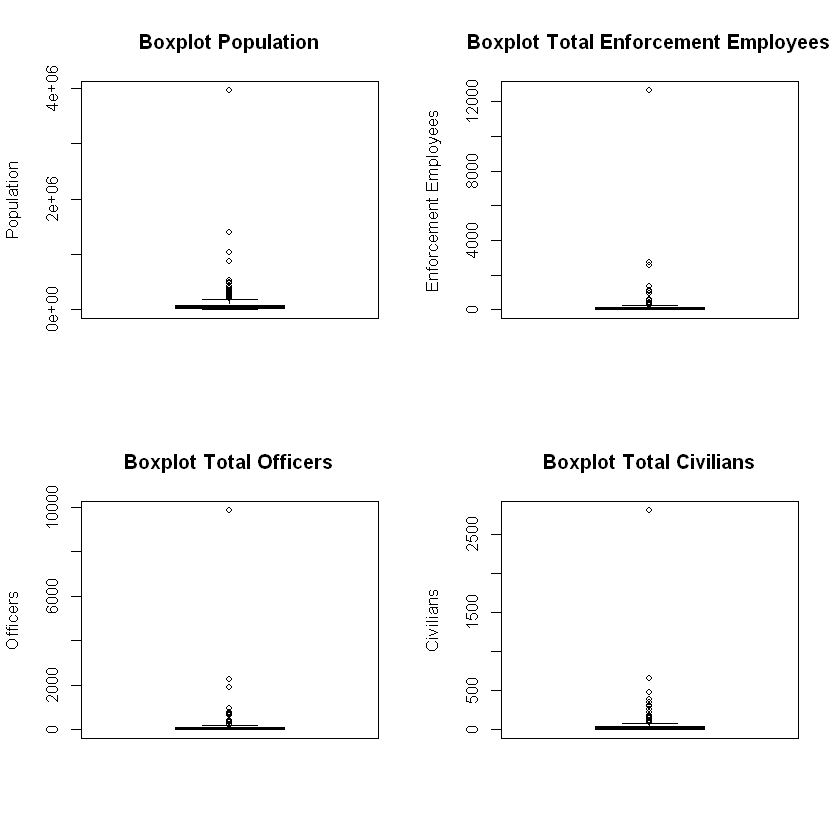

In [49]:
#Boxplot to check for outliers in ca_law_enforcement_by_city.csv
par(mfrow = c(2,2))
boxplot(law_city$Population, main = "Boxplot Population",ylab = "Population")
boxplot(law_city$Total.law.enforcement.employees, main = "Boxplot Total Enforcement Employees",ylab = "Enforcement Employees")
boxplot(law_city$Total..officers, main = "Boxplot Total Officers",ylab = "Officers")
boxplot(law_city$Total..civilians, main = "Boxplot Total Civilians",ylab = "Civilians")

In [45]:
#For Population Attribute
#22 outliers
length(boxplot.stats(law_city$Population)$out)
boxplot.stats(law_city$Population)$out
summary(law_city$Population)

[1] 22

[1]  349471  373887  265215  206982  232427  520837  202298  203233  258198
[10]  476318 3962726  210794  419481  207221  323064  489717  216477 1400467
[19]  863782 1031458  337304  304890

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    115   11879   33619   80736   81953 3962726 

In [47]:
#For Total officers Attribute
#26 outliers
length(boxplot.stats(law_city$Total..officers)$out)
boxplot.stats(law_city$Total..officers)$out
summary(law_city$Total..officers)

[1] 26

[1]  399  388  217  702  236  210  203  771 9863  216  734  206  234  237  221
[16]  368  646  214 1887 2236  939  302  203  389  214  212

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.0    16.0    39.0   112.5    85.0  9863.0 

# Preprocessing ca_law_enforcement_by_county.csv

In [ ]:
law_county$Total.law.enforcement.employees <- as.numeric(gsub(",", "", law_county$Total.law.enforcement.employees))
law_county$Total.officers <- as.numeric(gsub(",","",law_county$Total.officers))
law_county$Total.civilians <- as.numeric(gsub(",","",law_county$Total.civilians))
str(law_county)

In [53]:
#Checking missing values
colSums(is.na(law_county))

Metropolitan.Nonmetropolitan                          County 
                              0                               0 
Total.law.enforcement.employees                  Total.officers 
                              0                               0 
                Total.civilians 
                              0

# Preprocessing ca_offenses_by_city.csv

In [55]:
#Change chr type to num
offenses_city$Population <- as.numeric(gsub(",", "",offenses_city$Population))
offenses_city$Violent.crime <- as.numeric(gsub(",", "",offenses_city$Violent.crime))
offenses_city$Rape..revised.definition. <- as.numeric(gsub(",", "",offenses_city$Rape..revised.definition.))
offenses_city$Robbery <- as.numeric(gsub(",", "",offenses_city$Robbery))
offenses_city$Aggravated.assault <- as.numeric(gsub(",", "",offenses_city$Aggravated.assault))
offenses_city$Property.crime <- as.numeric(gsub(",", "",offenses_city$Property.crime))
offenses_city$Burglary <- as.numeric(gsub(",", "",offenses_city$Burglary))
offenses_city$Larceny.theft <- as.numeric(gsub(",", "",offenses_city$Larceny.theft))
offenses_city$Motor.vehicle.theft <- as.numeric(gsub(",", "",offenses_city$Motor.vehicle.theft))
offenses_city$Arson <- as.numeric(gsub(",", "",offenses_city$Arson))
str(offenses_city)

'data.frame':	460 obs. of  13 variables:
 $ City                                : chr  "Adelanto" "Agoura Hills" "Alameda" "Albany" ...
 $ Population                          : num  33005 20970 78613 19723 86175 ...
 $ Violent.crime                       : num  212 15 148 34 168 ...
 $ Murder.and.nonnegligent.manslaughter: int  2 0 2 1 1 0 0 1 18 0 ...
 $ Rape..revised.definition.           : num  14 1 7 6 13 5 13 7 129 4 ...
 $ Rape..legacy.definition.            : logi  NA NA NA NA NA NA ...
 $ Robbery                             : num  48 6 61 16 74 3 2 21 439 9 ...
 $ Aggravated.assault                  : num  148 8 78 11 80 24 20 29 685 75 ...
 $ Property.crime                      : num  808 310 1819 605 1929 ...
 $ Burglary                            : num  434 82 228 95 305 ...
 $ Larceny.theft                       : num  254 217 1245 447 1413 ...
 $ Motor.vehicle.theft                 : num  120 11 346 63 211 ...
 $ Arson                               : num  24 0 18 0 6 1 4 2

In [59]:
colSums(is.na(offenses_city))
#Rape..legacy.definition. attribute has 460 NA values, so we delete it.
offenses_city <- offenses_city[,-6]
head(offenses_city)

City                           Population 
                                   0                                    0 
                       Violent.crime Murder.and.nonnegligent.manslaughter 
                                   0                                    0 
           Rape..revised.definition.             Rape..legacy.definition. 
                                   0                                  460 
                             Robbery                   Aggravated.assault 
                                   0                                    0 
                      Property.crime                             Burglary 
                                   0                                    0 
                       Larceny.theft                  Motor.vehicle.theft 
                                   0                                    0 
                               Arson 
                                   0

,City,Population,Violent.crime,Murder.and.nonnegligent.manslaughter,Rape..revised.definition.,Robbery,Aggravated.assault,Property.crime,Burglary,Larceny.theft,Motor.vehicle.theft,Arson
,<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Adelanto,33005,212,2,14,48,148,808,434,254,120,24
2,Agoura Hills,20970,15,0,1,6,8,310,82,217,11,0
3,Alameda,78613,148,2,7,61,78,1819,228,1245,346,18
4,Albany,19723,34,1,6,16,11,605,95,447,63,0
5,Alhambra3,86175,168,1,13,74,80,1929,305,1413,211,6
6,Aliso Viejo,50751,32,0,5,3,24,363,53,276,34,1


# Preprocessing ca_offenses_by_county.csv

In [61]:
offenses_county <- offenses_county[rowSums(is.na(offenses_county)) < ncol(offenses_county), ]
colSums(is.na(offenses_county))

Metropolitan.Nonmetropolitan                               County 
                                   0                                    0 
                       Violent.crime Murder.and.nonnegligent.manslaughter 
                                   0                                    0 
           Rape..revised.definition.              Rape.legacy.definition. 
                                   0                                   57 
                             Robbery                   Aggravated.assault 
                                   0                                    0 
                      Property.crime                             Burglary 
                                   0                                    0 
                       Larceny.theft                  Motor.vehicle.theft 
                                   0                                    0 
                               Arson 
                                   0

#Rape..legacy.definition. attribute has 57 NA values
offenses_county <- offenses_county[,-6]
head(offenses_city)

In [67]:
#chr to num
offenses_county$Violent.crime <- as.numeric(gsub(",", "",offenses_county$Violent.crime))
offenses_county$Murder.and.nonnegligent.manslaughter <- as.numeric(gsub(",", "",offenses_county$Violent.crime))
offenses_county$Rape..revised.definition. <- as.numeric(gsub(",", "",offenses_county$Rape..revised.definition.))
offenses_county$Robbery <- as.numeric(gsub(",", "",offenses_county$Robbery))
offenses_county$Aggravated.assault <- as.numeric(gsub(",", "",offenses_county$Aggravated.assault))
offenses_county$Property.crime <- as.numeric(gsub(",", "",offenses_county$Property.crime))
offenses_county$Burglary <- as.numeric(gsub(",", "",offenses_county$Burglary))
offenses_county$Larceny.theft <- as.numeric(gsub(",", "",offenses_county$Larceny.theft))
offenses_county$Motor.vehicle.theft <- as.numeric(gsub(",", "",offenses_county$Motor.vehicle.theft))
offenses_county$Arson <- as.numeric(gsub(",", "",offenses_county$Arson))
str(offenses_county)

'data.frame':	57 obs. of  12 variables:
 $ Metropolitan.Nonmetropolitan        : chr  "Metropolitan Counties" "Metropolitan Counties" "Metropolitan Counties" "Metropolitan Counties" ...
 $ County                              : chr  "Alameda" "Butte3" "Contra Costa" "El Dorado3" ...
 $ Violent.crime                       : num  510 155 426 252 962 ...
 $ Murder.and.nonnegligent.manslaughter: num  510 155 426 252 962 ...
 $ Rape..revised.definition.           : num  13 20 24 46 32 6 157 16 304 18 ...
 $ Robbery                             : num  177 14 153 32 112 ...
 $ Aggravated.assault                  : num  314 117 235 165 810 ...
 $ Property.crime                      : num  2077 1422 2013 2031 3810 ...
 $ Burglary                            : num  463 708 660 577 1398 ...
 $ Larceny.theft                       : num  985 693 1332 1412 1838 ...
 $ Motor.vehicle.theft                 : num  629 21 21 42 574 ...
 $ Arson                               : num  11 0 18 4 145 21 300 5 215

# Distribution Type in ca_offenses_by_county.csv for Population και Violent Crime attributes

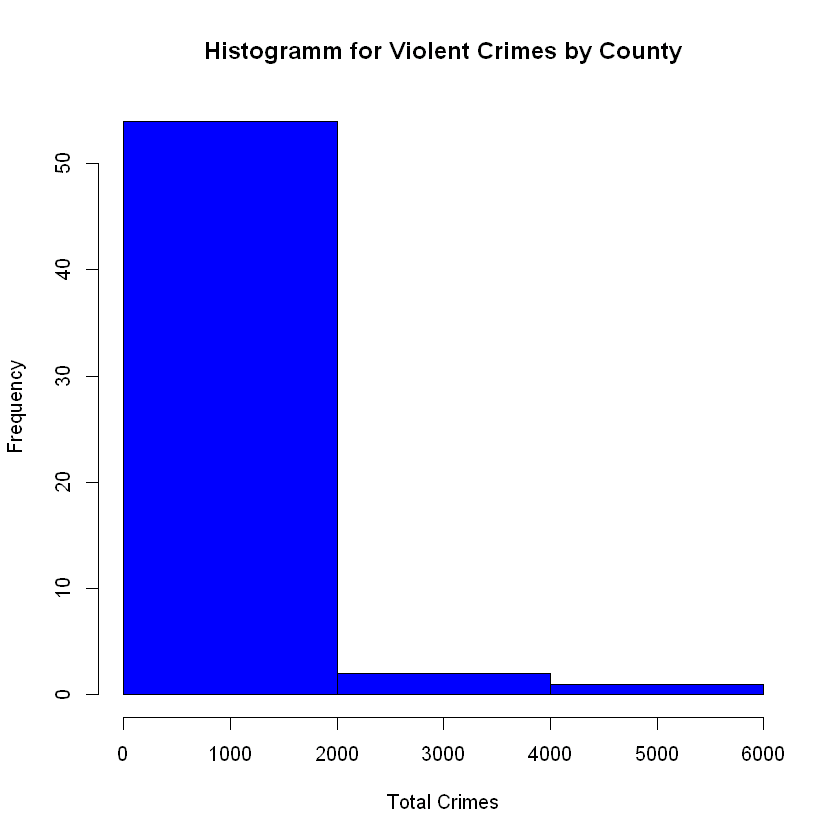

In [75]:
#Histogramm for Violent Crime by county to see Distribution Type
#positive skew
hist(offenses_county$Violent.crime, main = 'Histogramm for Violent Crimes by County',
     xlab = 'Total Crimes',ylab = 'Frequency',col = 'blue', breaks = 3)

In [79]:
#Shapiro test
#p<0.05, ΝΟΤ normal distribution
shapiro.test(offenses_county$Violent.crime)


	Shapiro-Wilk normality test

data:  offenses_county$Violent.crime
W = 0.48038, p-value = 6.621e-13
